# Stroke Data Exploration

Obtained from kaggle: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read & Survey Data

First, we will read in our dataset and gain some high-level information, such as number of features present, and percentage of positive labels.

**NB** The following cells assume the dataset has been downloaded and extracted to `data/`.

In [2]:
# Read in dataset csv
stroke_df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [3]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
num_strokes = len(stroke_df[stroke_df['stroke'] == 1])
total_rows = len(stroke_df)
print('Number of rows in dataset: ' + str(total_rows))
print('Percentage of strokes in dataset: ' + str(round((num_strokes / total_rows),3)) + '%')

Number of rows in dataset: 5110
Percentage of strokes in dataset: 0.049%


In [5]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


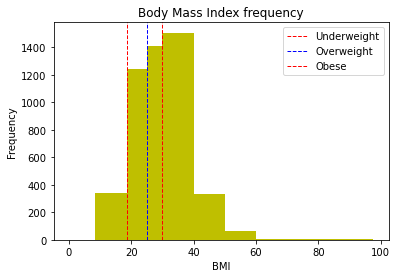

In [6]:
# Exploratory Visualisation
x = stroke_df['bmi']

plt.hist(x, bins=[0, 8.5, 18.5, 25, 30, 40, 50, 60, 70, x.max()], color='y')
plt.title('Body Mass Index frequency')
plt.axvline(18.5, color='r', linestyle='dashed', linewidth=1, label='Underweight')
plt.axvline(25, color='b', linestyle='dashed', linewidth=1, label='Overweight')
plt.axvline(30, color='r', linestyle='dashed', linewidth=1, label='Obese')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('images/bmi_hist.png')
plt.show()

In [7]:
# How much of our dataset has a healthy BMI
healthy_bmis = np.array(x.where((x > 18.5) & (x < 25)))

print('Healthy BMIs in dataset: ' + str(np.round(100*len(healthy_bmis[np.logical_not(np.isnan(healthy_bmis))]) / len(x), 3)) + '%')

# How much of our dataset are obese according to BMI
obese_bmis = np.array(x.where(x > 30))

print('Obese BMIs in dataset: ' + str(np.round(100*len(obese_bmis[np.logical_not(np.isnan(obese_bmis))]) / len(x), 3)) + '%')

Healthy BMIs in dataset: 24.09%
Obese BMIs in dataset: 37.045%
